In [31]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("Stock Market.csv")

1. Are there missing values in the dataset? 

df.isnull().sum()

2. What is the data type of each column? 

In [7]:
df.dtypes

Stock               object
Date                object
Open               float64
High               float64
Low                float64
Close              float64
Volume               int64
SMA_10             float64
RSI                float64
MACD               float64
Bollinger_Upper    float64
Bollinger_Lower    float64
GDP_Growth         float64
Inflation_Rate     float64
Interest_Rate      float64
Sentiment_Score    float64
Next_Close         float64
Target               int64
dtype: object

3. Convert Date to datetime format. 

In [8]:
df['Date']=pd.to_datetime(df['Date'])

In [9]:
df['Date'].head()

0   2010-01-04
1   2010-01-05
2   2010-01-07
3   2010-01-11
4   2010-01-12
Name: Date, dtype: datetime64[ns]

4. Check for duplicate rows. 

In [10]:
df.duplicated().sum()

np.int64(0)

5. Check the range of RSI (Relative Strength Index). 

In [13]:
df['RSI'].mean()

np.float64(49.827071947215956)

In [14]:
df['RSI'].max()

np.float64(89.99970361452127)

6.  Verify if Next_Close corresponds to the next day’s Close. 

In [33]:
df = df.sort_values('Date').reset_index(drop=True)
df['Next_Close_Shift'] = df['Close'].shift(-1)
(df['Next_Close'] == df['Next_Close_Shift']).mean()

np.float64(0.0)

7.  Check if any column has constant value. 

In [15]:
df.nunique()[df.nunique() == 1].index.tolist()

[]

8. Check if 'Target' only has 0s and 1s. 

In [17]:
df['Target'].unique()

array([0, 1])

9.  Are there outliers in Volume? 

In [19]:
x = df['Volume'].quantile(0.25)
y = df['Volume'].quantile(0.75)
IQR = y-x
print(df[(df['Volume'] < (x - 1.5*IQR)) | (df['Volume'] > (y + 1.5*IQR))])
print(len(df[(df['Volume'] < (x - 1.5*IQR)) | (df['Volume'] > (y + 1.5*IQR))]))

Empty DataFrame
Columns: [Stock, Date, Open, High, Low, Close, Volume, SMA_10, RSI, MACD, Bollinger_Upper, Bollinger_Lower, GDP_Growth, Inflation_Rate, Interest_Rate, Sentiment_Score, Next_Close, Target]
Index: []
0


10. Check correlation matrix. 

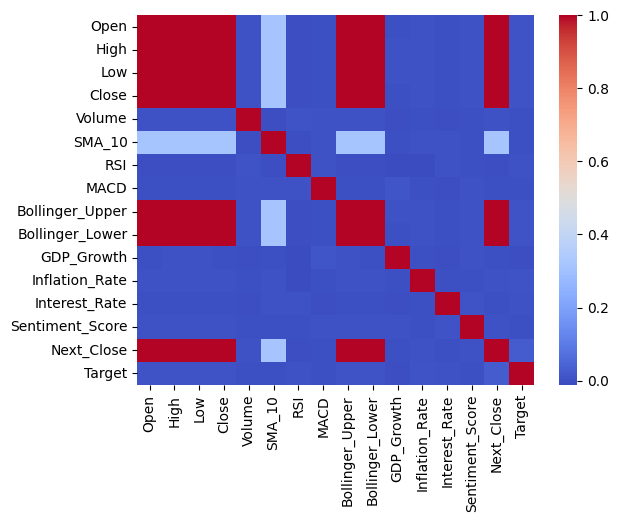

In [20]:
sns.heatmap(df.corr(numeric_only=True), cmap = 'coolwarm')
plt.show()

11. Are there negative values in Close, Open, MACD, etc.? 

In [21]:
for x in ['Close', 'Open', 'High', 'Low', 'MACD']:
    print(x, (df[x] < 0).sum())

Close 0
Open 0
High 0
Low 0
MACD 25122


12. Check for abrupt spikes in Interest Rate. 

In [23]:
z = np.abs((df['Interest_Rate'] - df['Interest_Rate'].mean()) / df['Interest_Rate'].std())
df[z > 3][['Date', 'Interest_Rate']]

,Date,Interest_Rate


13. Do Bollinger Bands make sense? 

In [34]:
df['SMA_20'] = df['Close'].rolling(window=20).mean()
df['STD_20'] = df['Close'].rolling(window=20).std()
df['Upper_Calc'] = df['SMA_20'] + (2 * df['STD_20'])
df['Lower_Calc'] = df['SMA_20'] - (2 * df['STD_20'])
df[['Date','Bollinger_Upper','Upper_Calc','Bollinger_Lower','Lower_Calc']].head()

,Date,Bollinger_Upper,Upper_Calc,Bollinger_Lower,Lower_Calc
0,2010-01-04,464.398638,NaN,438.231589,NaN
1,2010-01-04,473.767491,NaN,453.011087,NaN
2,2010-01-04,464.006812,NaN,448.087166,NaN
3,2010-01-04,141.017446,NaN,117.354627,NaN
4,2010-01-05,450.099041,NaN,431.018080,NaN


14. Is Sentiment_Score standardized (between -1 and 1)? 

In [24]:
df['Sentiment_Score'].mean()

np.float64(0.001428623232821714)

In [25]:
df['Sentiment_Score'].max()

np.float64(0.9999661752348248)

15.  What is the average trading volume? 

In [26]:
df['Volume'].mean()

np.float64(2547134.0776579473)

16. What % of data has RSI > 70 (overbought zone)? 

In [27]:
(df['RSI'] > 70).mean() * 100

np.float64(24.814792746628534)

17.  Check for monotonic date sequences. 

In [28]:
df['Date'].is_monotonic_increasing

False

18. Detect anomalies using Z-Score. 

In [32]:
df[np.abs(stats.zscore(df['Close'])) > 3]

,Stock,Date,Open,High,Low,Close,Volume,SMA_10,RSI,MACD,Bollinger_Upper,Bollinger_Lower,GDP_Growth,Inflation_Rate,Interest_Rate,Sentiment_Score,Next_Close,Target


19. Are the dates consecutive trading days (excluding weekends/holidays)? 

In [35]:
ds = df['Date'].sort_values().reset_index(drop=True)
missing_days = pd.bdate_range(start=ds.min(), end=ds.max()).difference(ds)
len(missing_days)

18570

20. Are any Open, Close, High, or Low values zero or negative? 

In [36]:
cols = ['Open','Close','High','Low']
for c in cols:
    print(c, "zeros:", (df[c]==0).sum(), "negatives:", (df[c]<0).sum())

Open zeros: 0 negatives: 0
Close zeros: 0 negatives: 0
High zeros: 0 negatives: 0
Low zeros: 0 negatives: 0


In [37]:
df.to_csv("Cleaned Stock Market.csv", index=False)